# Image postprocessing

In [1]:
################################################################################
# Imports
################################################################################

import astropy.units     as u
import matplotlib.pyplot as plt

from ctapipe.image         import dilate, tailcuts_clean, toymodel
from ctapipe.instrument    import CameraGeometry
from ctapipe.visualization import CameraDisplay

In [2]:
################################################################################
# Parameters
################################################################################

camgeoms = (
	'HESS-I',
	'HESS-II',
	'VERITAS',
	'Whipple109',
	'Whipple151'
)

In [3]:
################################################################################
# Initialization
################################################################################

camgeoms_len = len(camgeoms)

> (1/5) camgeom=HESS-I


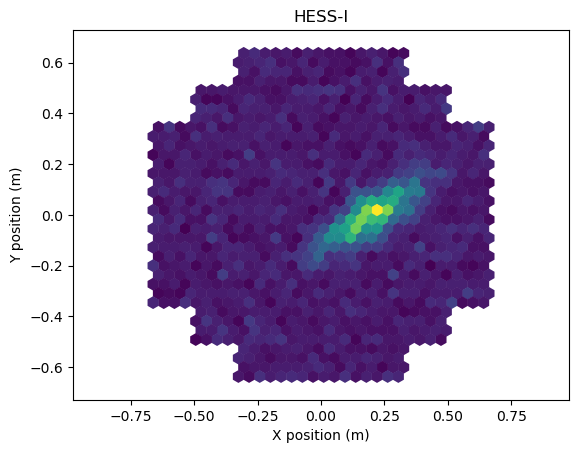

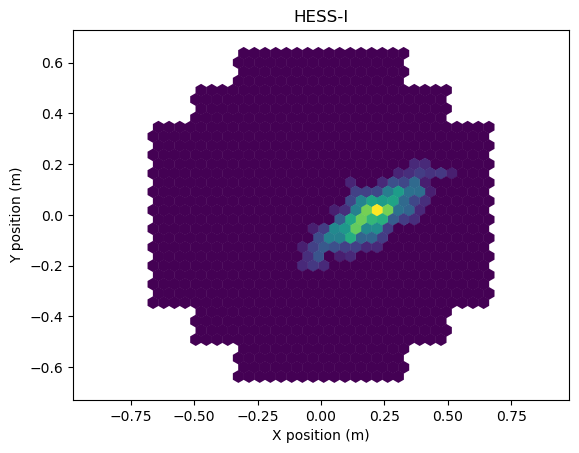

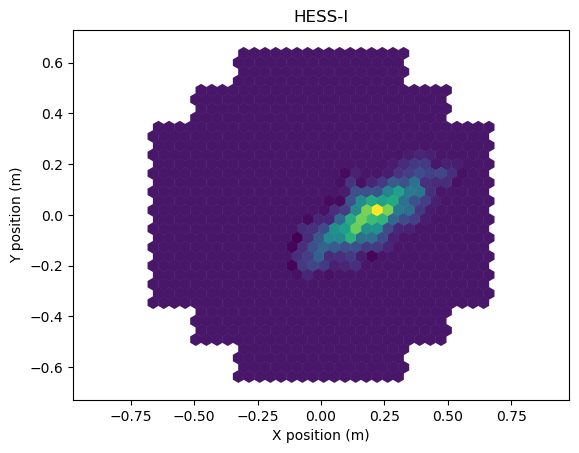

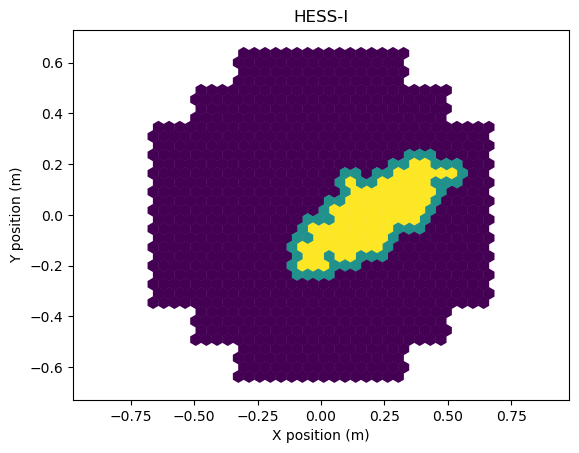

> (2/5) camgeom=HESS-II


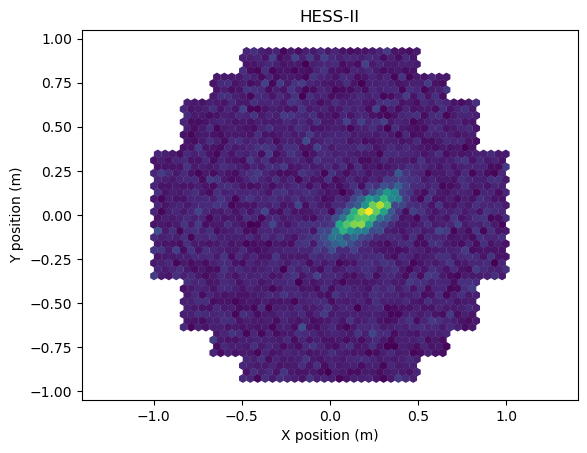

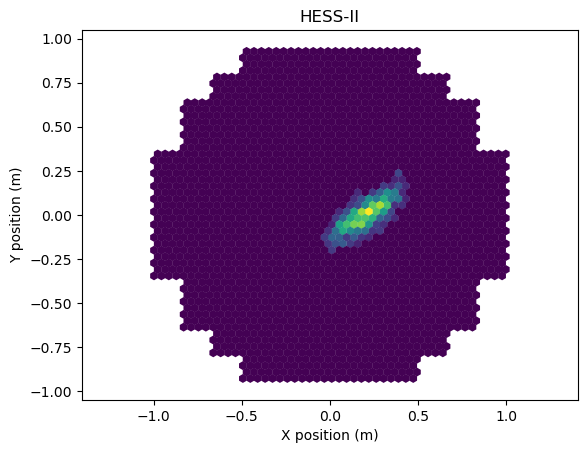

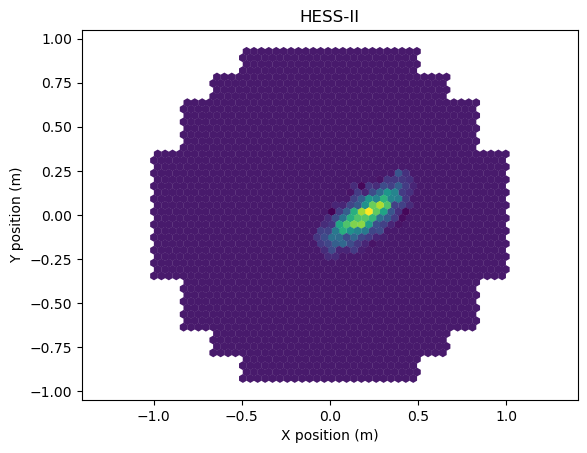

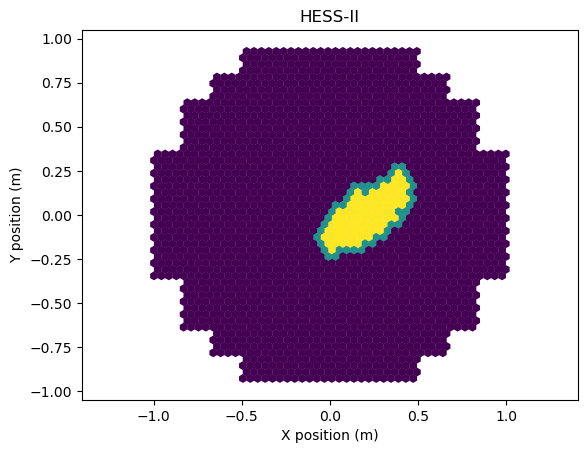

> (3/5) camgeom=VERITAS


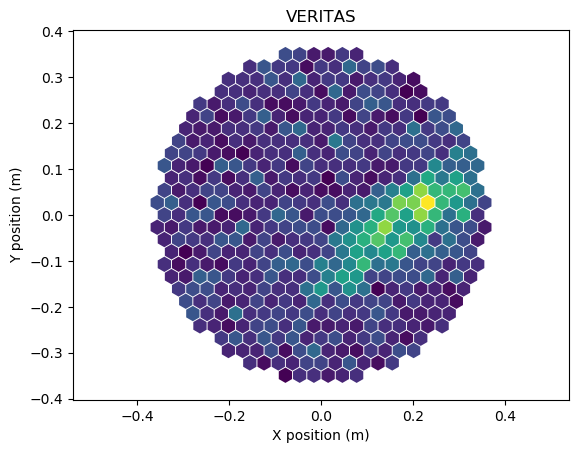

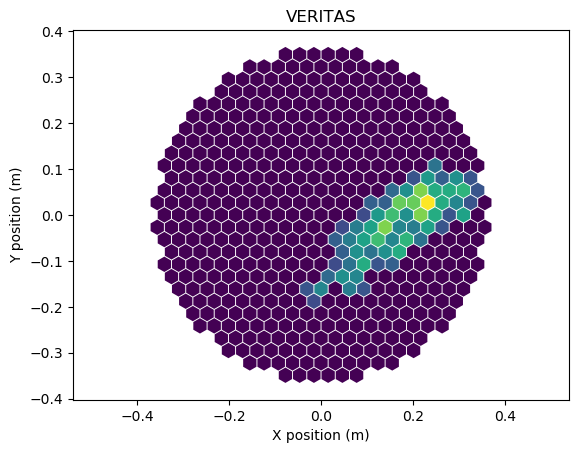

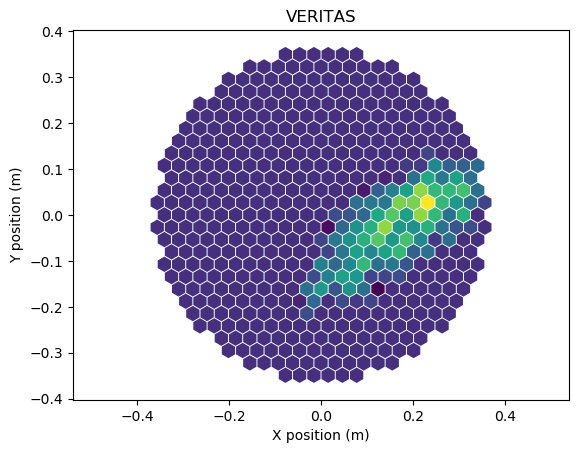

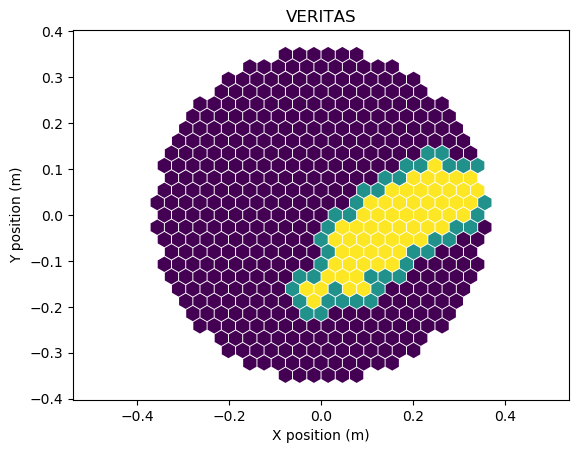

> (4/5) camgeom=Whipple109


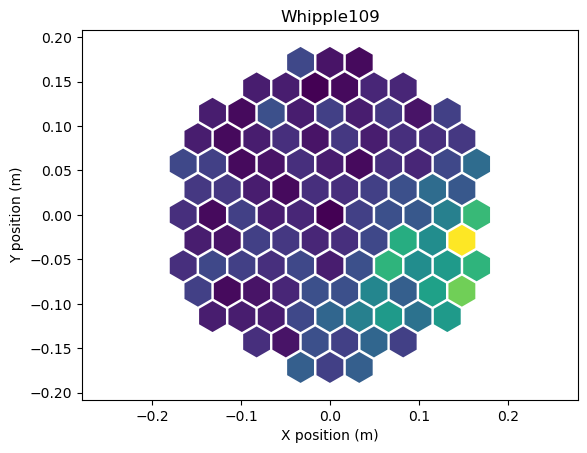

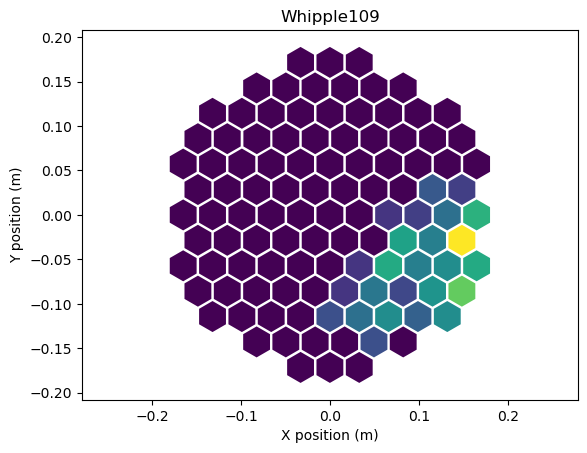

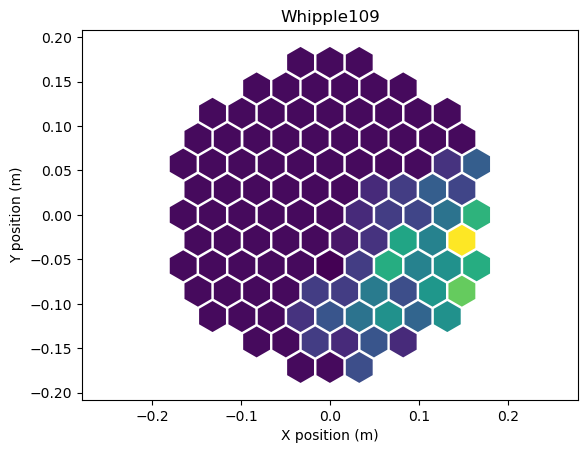

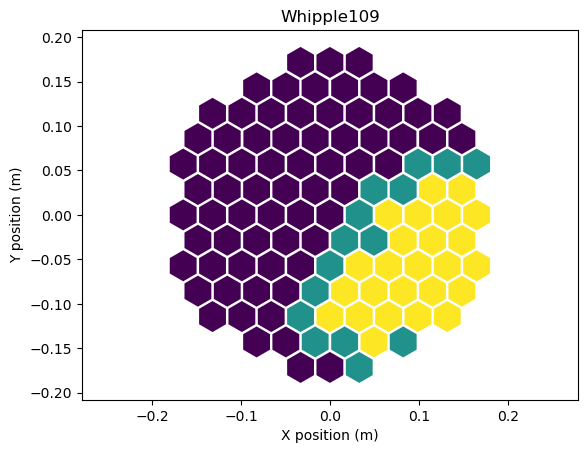

> (5/5) camgeom=Whipple151


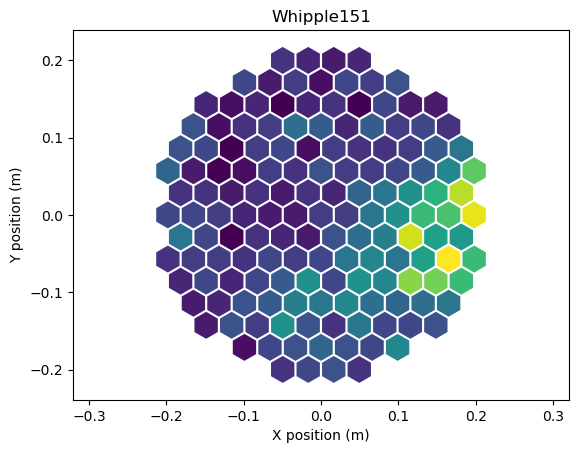

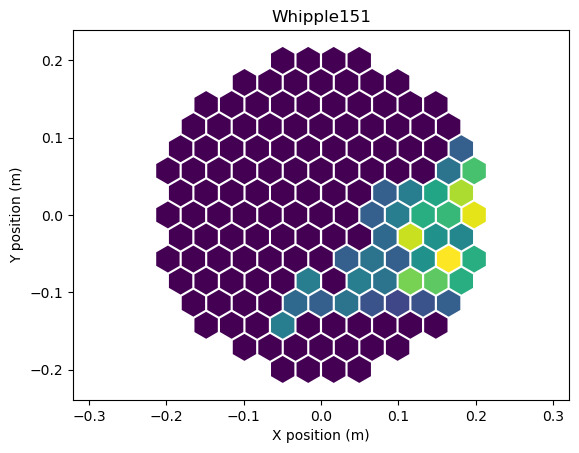

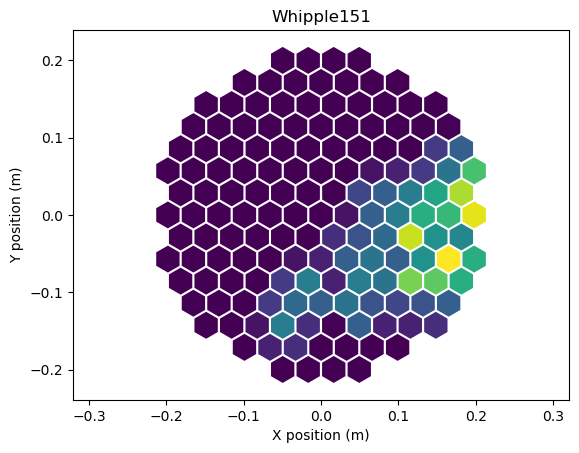

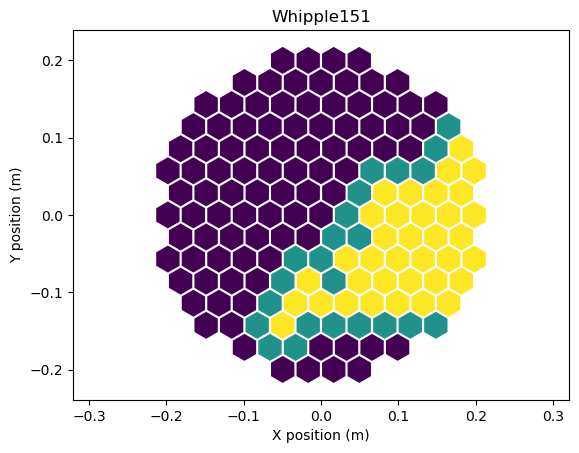

In [4]:
################################################################################
# Visualize hexagonal camera geometries and postprocessing
################################################################################

for camgeom_index, camgeom in enumerate(camgeoms):
	print(f'> ({camgeom_index + 1:{len(str(camgeoms_len))}}/{camgeoms_len}) camgeom={camgeom}')

	geom  = CameraGeometry.from_name(camgeom)
	model = toymodel.Gaussian(x = 0.2 * u.m, y = 0.0 * u.m, width = 0.05 * u.m, length = 0.15 * u.m, psi = '35d')

	image, sig, bg = model.generate_image(geom, intensity=1500, nsb_level_pe=5)

	disp = CameraDisplay(geom, image=image)
	plt.show(disp)

	cleanmask         = tailcuts_clean(geom, image, picture_thresh=10, boundary_thresh=5)
	clean             = image.copy()
	clean[~cleanmask] = 0.0

	disp = CameraDisplay(geom, image=clean)
	plt.show(disp)

	cleanmask_dilated                 = dilate(geom, cleanmask)
	clean_dilated                     = image.copy()
	clean_dilated[~cleanmask_dilated] = 0.0

	disp = CameraDisplay(geom, image=clean_dilated)
	plt.show(disp)

	cleanmasks_visualized = cleanmask.astype(int) + cleanmask_dilated.astype(int)

	disp = CameraDisplay(geom, image=cleanmasks_visualized)
	plt.show(disp)